#### Procesamiento Digital de Señales

# Tarea Semanal 7

#### Por Nahuel Braian Contreras

En esta actividad, generaremos 200 señales senoidales de una frecuencia $\dfrac{f_s}{4}$ a las cuales les sumaremos una señal de ruido uniforme que sigue la siguiente distribucion:

$$ f_r \sim \mathcal{U}(-2, \, 2) $$

Lo que trataermos de probar es que herramienta nos permite estimar la amplitud de las señales luego de que hayan sido contaminadas con ruido.
El primer estimador consistira en ver que valor toman las senoidales en potencia para una frecuencia de $\dfrac{f_s}{4}$, y hacer la media de las mismas.
El segundo estimador consistira en seleccionar en integrar la potencia de las senoidales en un entorno WBINS cercanos a $\dfrac{f_s}{4}$. Hacemos esto porque al meter la señal de ruido, la energia de la senoidal se "desparrama" y ya no esta concentrada en un delta en su frencuencia.

A cada realizacion le aplicaremos las ventanas vistas en la "Tarea Semana 6" y veremos las caracteristicas de cada una al mejorar o empeorar algunos parametros de los estimadores

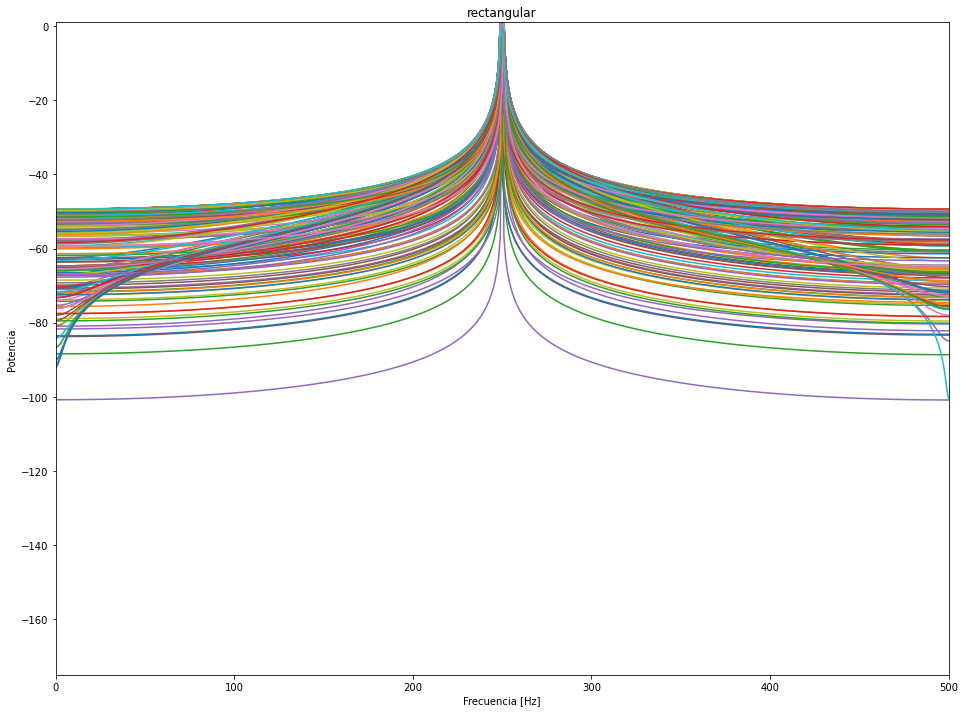

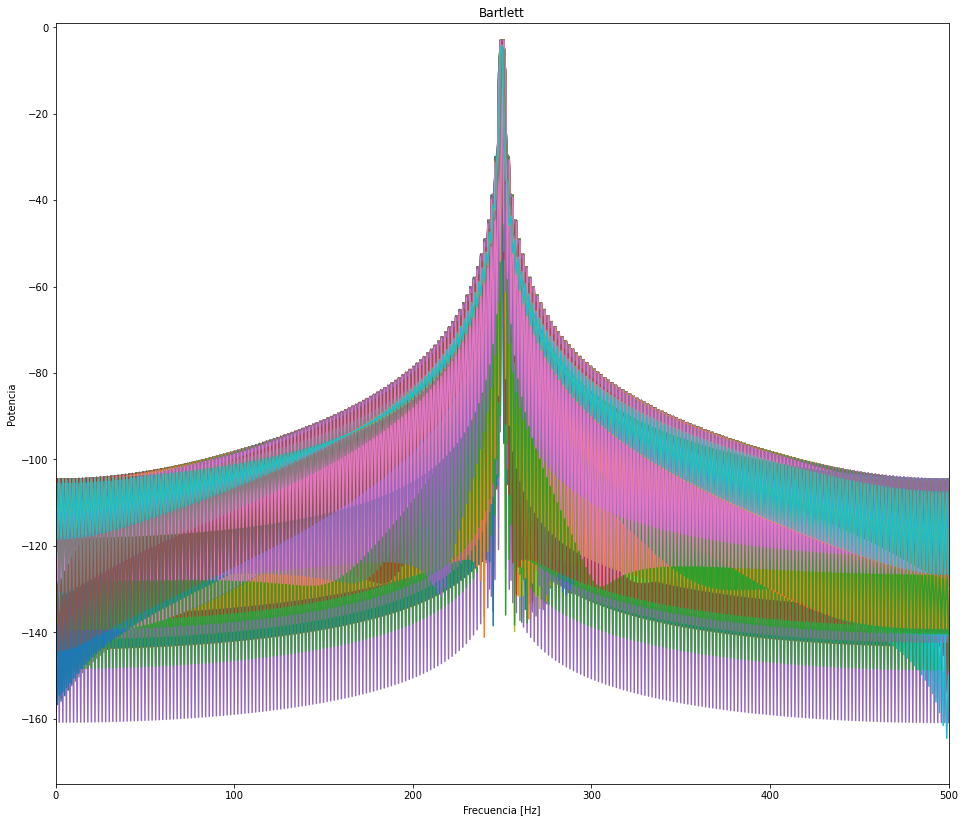

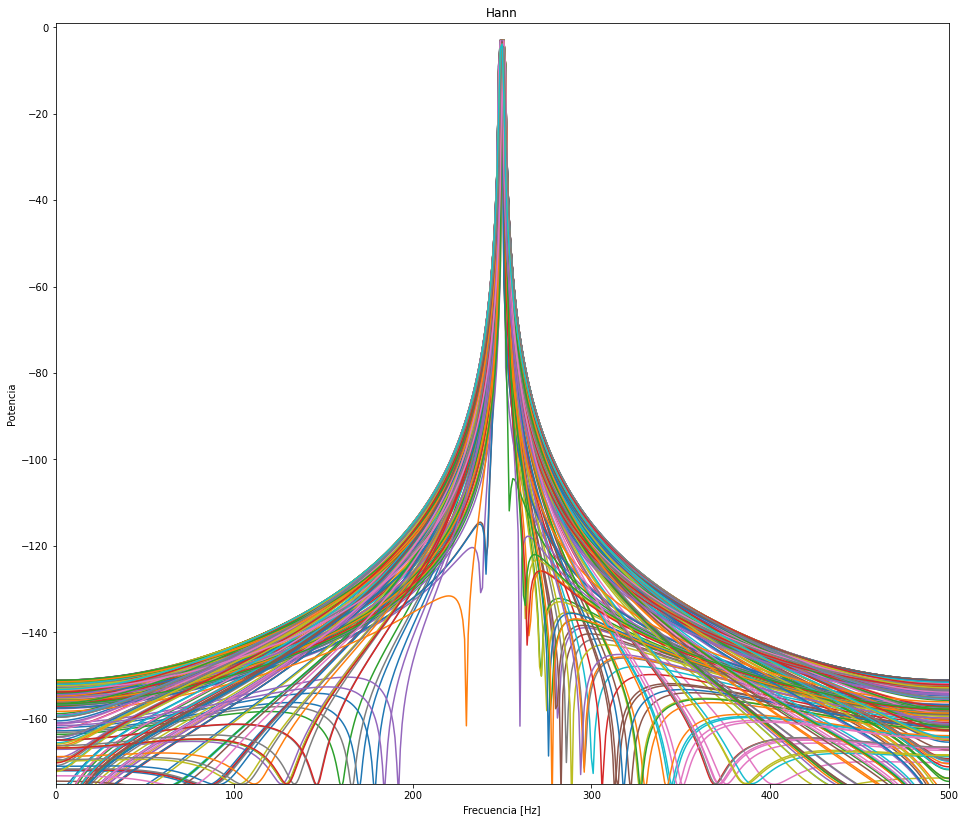

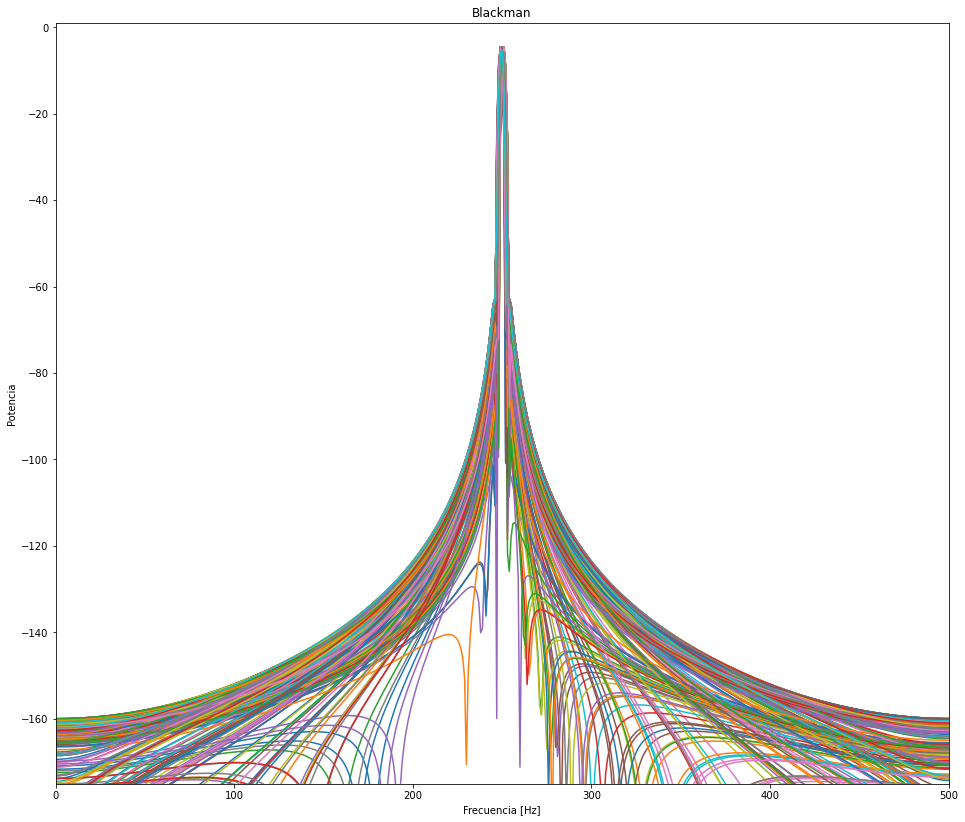

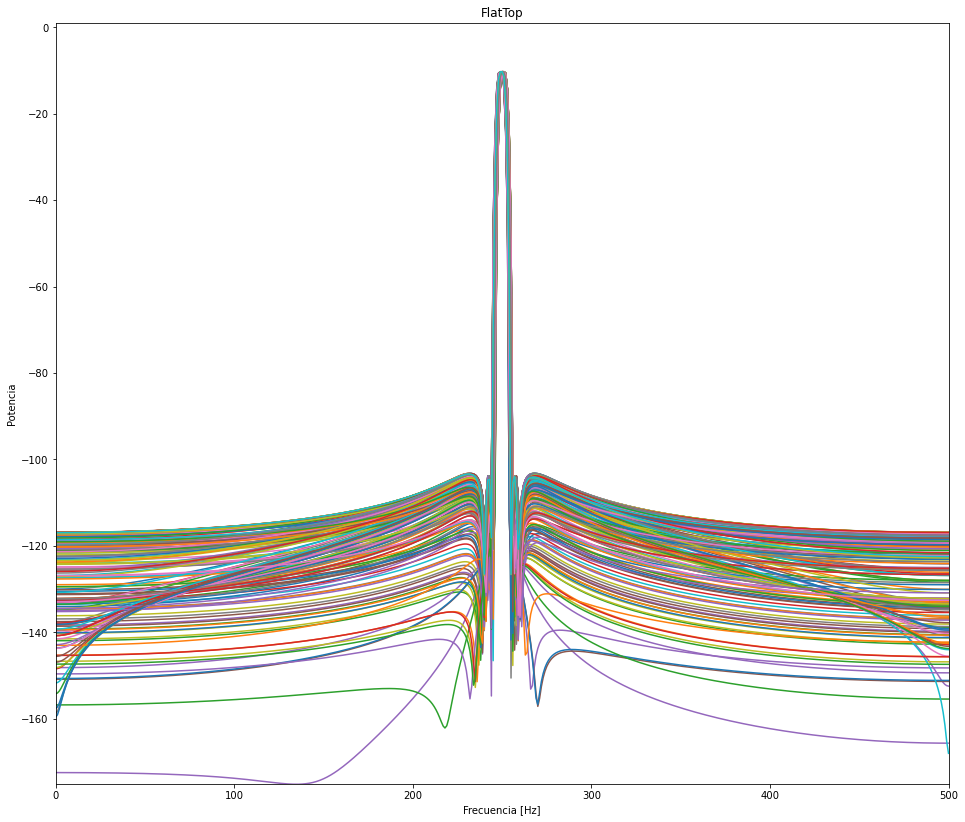

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig


fs = 1000 # frecuencia de muestreo
N = 1000   # cantidad de muestras
freq = fs/4
DC = 0
Amplitud = 2

Wbins = 3

realizaciones = 200
ts = 1/fs
tt = np.linspace(0, (N-1)*ts, N)

## reshape para no tener dimension 0
Bartlett    = sig.windows.bartlett(N).reshape(N,1)
Hann        = sig.windows.hann(N).reshape(N,1)
Blackman    = sig.windows.blackman(N).reshape(N,1)              
FlatTop     = sig.windows.flattop(N).reshape(N,1)

# funciones = np.arange(realizaciones*N).reshape(realizaciones, N)

noise = (np.random.rand(1,realizaciones) - 0.5) * 2 #ruido va desde -2 a 2

tt = np.linspace(0, (N-1)*ts, N).reshape((N,1))
Omega = (np.pi/2 + noise * ((np.pi*2/N)))*fs*tt

# aplico las ventanas a la senoidal
XX_sin_rect = np.sin(Omega)*Amplitud
XX_sin_Bartlett = XX_sin_rect*Bartlett
XX_sin_Hann = XX_sin_rect*Hann
XX_sin_Blackman = XX_sin_rect*Blackman
XX_sin_FlatTop = XX_sin_rect*FlatTop

# realizo la fft de las señales
XX_rect = np.fft.fft(XX_sin_rect, axis = 0)/XX_sin_rect.shape[0]
XX_Bart = np.fft.fft(XX_sin_Bartlett, axis = 0)/XX_sin_Bartlett.shape[0]
XX_Hann = np.fft.fft(XX_sin_Hann, axis = 0)/XX_sin_Hann.shape[0]
XX_Black = np.fft.fft(XX_sin_Blackman, axis = 0)/XX_sin_Blackman.shape[0]
XX_Flat = np.fft.fft(XX_sin_FlatTop, axis = 0)/XX_sin_FlatTop.shape[0]

ff = np.arange(0, fs, fs/N)
bfrec = ff<= fs/2
plt.figure(1)
plt.gcf().set_size_inches(16, 12)
plt.plot(ff[ff <= fs/2],10*np.log10(2*np.abs(XX_rect[ff <= fs/2 , :])**2))
plt.title("Rectangular")
plt.ylim([-175, 1])
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia")
plt.autoscale(enable=True, axis='x', tight=True)

plt.figure(2)
plt.gcf().set_size_inches(16, 14)
plt.plot(ff[ff <= fs/2],10*np.log10(2*np.abs(XX_Bart[ff <= fs/2 , :])**2))
plt.ylim([-175, 1])
plt.title("Bartlett")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia")
plt.autoscale(enable=True, axis='x', tight=True)

plt.figure(3)
plt.gcf().set_size_inches(16, 14)
plt.plot(ff[ff <= fs/2],10*np.log10(2*np.abs(XX_Hann[ff <= fs/2 , :])**2))
plt.ylim([-175, 1])
plt.title("Hann")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia")
plt.autoscale(enable=True, axis='x', tight=True)

plt.figure(4)
plt.gcf().set_size_inches(16, 14)
plt.plot(ff[ff <= fs/2],10*np.log10(2*np.abs(XX_Black[ff <= fs/2 , :])**2))
plt.ylim([-175, 1])
plt.title("Blackman")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia")
plt.autoscale(enable=True, axis='x', tight=True)

plt.figure(5)
plt.gcf().set_size_inches(16, 14)
plt.plot(ff[ff <= fs/2],10*np.log10(2*np.abs(XX_Flat[ff <= fs/2 , :])**2))
plt.ylim([-175, 1])
plt.title("FlatTop")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia")
plt.autoscale(enable=True, axis='x', tight=True)


In [ ]:
#rectangular
estimacion_amp_rect = np.abs(XX_rect[250 , :])*2
Densidad_Potencia_rect = 2*np.abs(XX_rect)**2
sub_matriz_rect = Densidad_Potencia_rect[250-Wbins:250+Wbins+1, :]
Potencia_estimada_rect = np.sum(sub_matriz_rect, axis = 0)
Amplitud_estimada_rect = np.sqrt(2*Potencia_estimada_rect)

#Bartlett
estimacion_amp_Bart = np.abs(XX_Bart[250 , :])*2
Densidad_Potencia_Bart = 2*np.abs(XX_Bart)**2
sub_matriz_Bart = Densidad_Potencia_Bart[250-Wbins:250+Wbins+1, :]
Potencia_estimada_Bart = np.sum(sub_matriz_Bart, axis = 0)
Amplitud_estimada_Bart = np.sqrt(2*Potencia_estimada_Bart)

#Hann
estimacion_amp_Hann = np.abs(XX_Hann[250 , :])*2
Densidad_Potencia_Hann = 2*np.abs(XX_Hann)**2
sub_matriz_Hann = Densidad_Potencia_Hann[250-Wbins:250+Wbins+1, :]
Potencia_estimada_Hann = np.sum(sub_matriz_Hann, axis = 0)
Amplitud_estimada_Hann = np.sqrt(2*Potencia_estimada_Hann)

#BlackMan
estimacion_amp_Black = np.abs(XX_Black[250 , :])*2
Densidad_Potencia_Black = 2*np.abs(XX_Black)**2
sub_matriz_Black = Densidad_Potencia_Black[250-Wbins:250+Wbins+1, :]
Potencia_estimada_Black = np.sum(sub_matriz_Black, axis = 0)
Amplitud_estimada_Black = np.sqrt(2*Potencia_estimada_Black)

#FlatTop
estimacion_amp_Flat = np.abs(XX_Flat[250 , :])*2
Densidad_Potencia_Flat = 2*np.abs(XX_Flat)**2
sub_matriz_Flat = Densidad_Potencia_Flat[250-Wbins:250+Wbins+1, :]
Potencia_estimada_Flat = np.sum(sub_matriz_Flat, axis = 0)
Amplitud_estimada_Flat = np.sqrt(2*Potencia_estimada_Flat)

# vstack concatena verticalmente
Estimadores_rect = np.vstack([estimacion_amp_rect, Amplitud_estimada_rect]).transpose()
Estimadores_Bart = np.vstack([estimacion_amp_Bart, Amplitud_estimada_Bart]).transpose()
Estimadores_Hann = np.vstack([estimacion_amp_Hann, Amplitud_estimada_Hann]).transpose()
Estimadores_Black = np.vstack([estimacion_amp_Black, Amplitud_estimada_Black]).transpose()
Estimadores_Flat = np.vstack([estimacion_amp_Flat, Amplitud_estimada_Flat]).transpose()

# rectangular
Medianas_rect = np.median(Estimadores_rect, axis = 0)
Sesgo_rect = np.median(Estimadores_rect, axis = 0) - Amplitud
Varianza_rect = np.mean((Estimadores_rect - Medianas_rect)**2, axis = 0)

# Bartlett
Medianas_Bart = np.median(Estimadores_Bart, axis = 0)
Sesgo_Bart = np.median(Estimadores_Bart, axis = 0) - Amplitud
Varianza_Bart = np.mean((Estimadores_Bart - Medianas_Bart)**2, axis = 0)

# Hann
Medianas_Hann = np.median(Estimadores_Hann, axis = 0)
Sesgo_Hann = np.median(Estimadores_Hann, axis = 0) - Amplitud
Varianza_Hann = np.mean((Estimadores_Hann - Medianas_Hann)**2, axis = 0)

# Blackman
Medianas_Black = np.median(Estimadores_Black, axis = 0)
Sesgo_Black = np.median(Estimadores_Black, axis = 0) - Amplitud
Varianza_Black = np.mean((Estimadores_Black - Medianas_Black)**2, axis = 0)

#FlatTop
Medianas_Flat = np.median(Estimadores_Flat, axis = 0)
Sesgo_Flat = np.median(Estimadores_Flat, axis = 0) - Amplitud
Varianza_Flat = np.mean((Estimadores_Flat - Medianas_Flat)**2, axis = 0)

#Agrupo por estimador
Est_Slide = np.vstack([estimacion_amp_rect, estimacion_amp_Bart,estimacion_amp_Hann,estimacion_amp_Black, estimacion_amp_Flat]).transpose()
Est_integral = np.vstack([Amplitud_estimada_rect, Amplitud_estimada_Bart, Amplitud_estimada_Hann, Amplitud_estimada_Black, Amplitud_estimada_Flat]).transpose()

# Histogramas
# plt.clf()
# plt.figure(1)
# plt.title("Slice")
# kwargs = dict(alpha=0.5,bins = 10, density=False, stacked=True)
# kwargs_2 = dict(alpha=0.5, bins = 2,density=False, stacked=True)
# plt.hist(Est_Slide[:,0],**kwargs, label = "Rectangular")
# plt.hist(Est_Slide[:,1],**kwargs, label = "Bartlett")
# plt.hist(Est_Slide[:,2],**kwargs, label = "Hann")
# plt.hist(Est_Slide[:,3],**kwargs, label = "Blackman")
# plt.hist(Est_Slide[:,4],**kwargs_2, label = "FlatTop")
# plt.legend()

In [23]:
import pandas
from pandas import DataFrame
from IPython.display import HTML
#                      SESGO,             VARIANZA 
tus_resultados_slice = [ 
                   [Sesgo_rect[0], Varianza_rect[0]], # <-- Rectangular  Slice 
                   [Sesgo_Bart[0], Varianza_Bart[0]], # <-- Bartlett     Slice
                   [Sesgo_Hann[0], Varianza_Hann[0]], # <-- Hann         Slice
                   [Sesgo_Black[0], Varianza_Black[0]], # <-- Blackman     Slice
                   [Sesgo_Flat[0], Varianza_Flat[0]], # <-- FlatTop      Slice
                 ]
df_slice = DataFrame(tus_resultados_slice, columns=['$\Large s_a$', '$\Large v_a$'],
               index=[  
                        'Rectangular Slice',
                        'Bartlett Slice',
                        'Hann Slice',
                        'Blackman Slice',
                        'Flat-top Slice',
                     ])
HTML(df_slice.to_html(col_space = '300px', justify = 'center'))

,$\Large s_a$,$\Large v_a$
Rectangular Slice,-0.767701,0.422125
Bartlett Slice,-1.201140,0.035665
Hann Slice,-1.160897,0.024862
Blackman Slice,-1.266488,0.011409
Flat-top Slice,-1.569869,0.000021


Al tomar solo una "feta" de las señales, podemos ver como la ventana de FlatTop es la que nos da una menor varianza, con un mayor sesgo.

In [21]:
tus_resultados_intgr = [ 
                   [Sesgo_rect[1], Varianza_rect[1]], # <-- Rectangular  Integral
                   [Sesgo_Flat[1], Varianza_Flat[1]], # <-- FlatTop      Integral
                   [Sesgo_Bart[1], Varianza_Bart[1]], # <-- Bartlett     Integral
                   [Sesgo_Hann[1], Varianza_Hann[1]], # <-- Hann         Integral
                   [Sesgo_Black[1], Varianza_Black[1]], # <-- Blackman     Integral
                 ]
df_intgr = DataFrame(tus_resultados_intgr, columns=['$\Large s_a$', '$\Large v_a$'],
               index=[  
                        'Rectangular Integral',
                        'Flat-top Integral',
                        'Bartlett Integral',
                        'Hann Integral',             
                        'Blackman Integral'

                     ])

HTML(df_intgr.to_html(col_space = '300px', justify = 'center'))

,$\Large s_a$,$\Large v_a$
Rectangular Integral,-0.031540,4.491216e-04
Flat-top Integral,-1.163802,1.664081e-06
Bartlett Integral,-0.846210,1.359551e-07
Hann Integral,-0.775890,2.464182e-10
Blackman Integral,-0.896741,3.849851e-13


Procemos a ordendarlos de de manera varianza decreciente.

En el caso de tomar un conjunto de BINS(3) proximos a la frecuencia elegida y realizar una integral entre esos valores, podemos ver que tenemos un pequeña varianza(Incluso menor que la del FlatTop en el anterior caso). Al hacer esta tecnica, vemos que FlatTop no nos entrega la menor varianza, pero si el mayor sesgo, siendo superado ampliamente por la ventana del tipo BlackMan.